## 6COSC00W - Applied AI CourseWork

#### Project Title - "Fake News Detector"
#### Research Domain - "News publishing and Writing"


# PART - A

#### Problem and Research Domain



'News Publishing and Writing' is this project's target domain. The process of drafting, editing, and disseminating news stories and reports is known as news publishing and writing. This might entail conducting research and gathering information, interviewing sources, creating and editing material, and releasing it via different channels such as newspapers, websites, and social media.
AI (Artificial Intelligence) may be used in this field in a variety of ways, including content selection and recommendation, automated news generating, and even fact-checking and verification of news stories, where AI is used to by spotting any errors or bias in the material. 
The identification and categorization of fake news is within the realm of the aforementioned target domain.

<img src="images/fakenews.jpg" width="300" height="200">

Fake news is circulated by a wide range of people, including individuals, organizations, and even governments, for a number of objectives, including financial gain, political manipulation, or just to sow chaos and confusion.

It is spread through a variety of channels, including social media, where users are more likely to click on and share sensational or shocking headlines, websites and blogs that are designed to disseminate false information, email and messaging apps where users may forward or share articles and stories without fact-checking them first, conventional news sources where stories are published without fact-checking them first or when they knowingly publish false information, and bots and automation that can be programmed to share or post fake news on a large scale.

Fake news classification is a particular work that requires training a model to identify news stories as real or fake, whereas fake news detection is a broader concept that covers activities like tracking and evaluating the spread of misinformation, as well as taking action to stop it.

<img src="images/newsclassification.jpg" width="300" height="200">

Several studies and articles have been published on how AI is being used in fact checking and news verification.
One research applied artificial intelligence to help in fact-checking news articles by identifying probable errors or bias in the material. The technology correctly identified misinformation and suggested fixes. (Kaliyar, 2018)

Another method is to utilize natural language processing (NLP) tools to evaluate the language used in news items and uncover probable errors or bias. By evaluating the language used in the articles, one research employed NLP (Natural Language Processing) to assess news stories and identify erroneous or misleading information. (Lee et al., 2019)

This project entails categorizing false news that circulates on social media and news channels. Kaggle was used to compile datasets of authentic and fraudulent news from various sources. The implementation entails using Natural Language Processing (NLP) techniques such as Text Classification in the preprocessing step, to process the text input into the model. The Bi-Directional LSTM (Long Short Term Memory), a form of RNN (Recurrent Neural Network), is then used in a Deep Learning (DL) technique.


In [185]:
# importing the necessary libraries, modules and platforms

import pandas as pd
import numpy as np
import nltk

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [186]:
# read both training data and testing data

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


# display the first 5 data points in the training dataset
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# PART - B


The classification of news is the subject of this study (Real or Fake).

Data science may be used in a variety of ways to identify fake news. One strategy is to evaluate the content of articles using natural language processing (NLP) tools to look for patterns or traits that indicate false news. NLP, for instance, may be used to spot sensational language, clickbait headlines, and a lack of reliable sources.

For many of its functions, deep learning algorithms are widely utilized in the AI area of natural language processing (NLP).

Another strategy is to utilize ML and DL algorithms to categorize articles as authentic or fraudulent based on characteristics like the text, the source, or the level of social media activity. The classifier may be utilized to determine whether or not new articles are authentic after being trained on a dataset of labeled articles. To identify false news, one can employ a mix of these techniques and others.

Within the larger field of artificial intelligence (AI), there are two related but separate topics called machine learning (ML) and deep learning (DL). The creation of algorithms and models that can learn from data and make predictions or judgments without being explicitly programmed is known as machine learning (ML), and it is a subset of artificial intelligence.

Deep Neural Networks (DNNs) are networks of artificial neurons created to mimic the functioning of the human brain. Deep Learning (DL) is a subset of Machine Learning (ML) that uses DNNs. Natural language processing, speech and picture recognition, as well as other jobs requiring a significant quantity of data, are particularly well suited for DL algorithms.


For various reasons, including the following, deep learning (DL) can be more accurate than conventional machine learning (ML) at spotting fake news:

-	Handling a lot of data: This may be helpful in identifying false news since the algorithms can examine the text in the news story as well as any photographs, videos, and other multimedia components that are included.

-	Handling structured data: This can be helpful in spotting false news since the information in the structured data can be utilized to confirm the accuracy of the article.

-	Handling complex patterns: This might be helpful in spotting fake news since some patterns in the text may be a sign of inaccurate information.

-	Handling sequential data: DL algorithms are able to comprehend the text's context and identify patterns in the data that conventional machine learning algorithms could miss.



Following the revelation that DL outperforms ML in classifying news as fake or true, a number of deep learning (DL) algorithms may be applied to identify fake news, including:

1.	RNNs - are a class of deep learning algorithms that are useful for analyzing sequential data, including text. They have been demonstrated to achieve great accuracy in identifying false news and may be used to categorize articles as authentic or fake based on the language.


2.	CNNs - CNNs are a subset of deep learning algorithms that are useful for analyzing image and video data. They are capable of spotting altered pictures or videos that may be used in false news reports. They have been demonstrated to attain high accuracy in identifying false news and perform well with vast volumes of text data, therefore they are also employed for text classification tasks.


3.	Transformer-based models, including BERT and GPT, are a kind of DL algorithm that may be utilized to examine text data. They may be used to comprehend the text's context and spot trends that can point to bogus news.



Given that the DL algorithms stated above have strengths that correspond to their advantages and weaknesses that correspond to their disadvantages, a single table has been created to present all relevant data regarding the benefits and drawbacks of the algorithms.

<img src="images/Advantages_Disadvantages_Table.jpg" width="600" height="900">


### Data Pre-Processing

In [187]:
# remove all rows consisting of null values
train_df = train_df.dropna()

In [188]:
# independent features

x = train_df.drop('label', axis = 1)

# dependent features
y = train_df['label']

y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [189]:
# keep the vocabulary size limited, for accuracy decreases if the vocubulary size increases.
vocabulary_size = 5000 

new_table = x.copy()
new_table.reset_index(inplace=True) # since the null values were removed, indexes will disordered and so indexes have been reset.
new_table.head(20)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [190]:
stemmer = PorterStemmer()
corpus = [] # consists of rows of stemmed words

for i in range(0, len(new_table)):
    
    review = re.sub('[^A-Za-z]', ' ', new_table['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]

    review = ' '.join(review)
    corpus.append(review)



In [195]:
corpus[0] # displays the stemmed and cleaned data in the 'title' column of the first data point.

'hous dem aid even see comey letter jason chaffetz tweet'

##### Onehot Representation

In [192]:
# A unique value (in integers) is assigned to each word in the corpus list
onehot_representation = [one_hot(words, vocabulary_size)for words in corpus]
onehot_representation[0:5]

[[2601, 114, 4432, 1382, 525, 3828, 2675, 3822, 1478, 2902],
 [1263, 4728, 722, 180, 2522, 2553, 3477],
 [4628, 988, 2527, 1358],
 [3017, 4535, 4866, 388, 4836, 1528],
 [873, 2522, 363, 2315, 2680, 2771, 2522, 3436, 4965, 1430]]

##### Embedding Representation

In [196]:
sentence_length = 20

embedded_layers=pad_sequences(onehot_representation,padding='pre',maxlen=sentence_length) # pads the sequence with 0s at the beginning, until the sequence has a length of 20.
embedded_layers

array([[   0,    0,    0, ..., 3822, 1478, 2902],
       [   0,    0,    0, ..., 2522, 2553, 3477],
       [   0,    0,    0, ...,  988, 2527, 1358],
       ...,
       [   0,    0,    0, ..., 3479, 4764, 2569],
       [   0,    0,    0, ...,  198,  126, 1012],
       [   0,    0,    0, ...,  481, 2704, 3386]])

### Determining which technique to choose

In comparison to other deep learning (DL) algorithms like CNNs and Transformer-based models like BERT and GPT, RNNs can be very effective in spotting fake news sinin terms of handling:

-	Sequential data: For tasks involving sequential data, like text, RNNs are especially well suited. They are able to comprehend the text's context and spot patterns in the data that CNNs and models based on Transformers could miss.

-	Long-term dependencies: Long-term dependencies in the text can be handled by RNNs, especially LSTMs, which means they can take into consideration information from earlier in the text even when processing later sections of the text.

-	Structured data - By fusing sequential data with structured data, RNNs can process structured data like tables, pictures, and graphs.


RNN has several types in addition to having been shown to be better than CNN and Transformer-based models in the classification of news. They are:
1.	Simple RNN - the most fundamental kind of RNN. It can handle data sequences like text or voice since it contains a single layer of recurrent neurons.

2.	Long Short-Term Memory (LSTM) - is a kind of RNN that use gates to manage the flow of information across the network and memory cells to store information from the past. For applications like language modeling, text production, and speech recognition, LSTM networks can manage long-term dependencies in the data.

3.	Bidirectional RNN - processes the input sequence both forward and backward is referred to as a bidirectional RNN. This indicates that there are two distinct recurrent layers in the network, one of which processes the input sequence in a forward manner and the other of which processes it in a backward fashion. The input sequence is processed from left to right by the forward layer and from right to left by the reverse layer. The two layers' results are then combined and utilized to provide a forecast. In tasks like language modeling, text categorization, and speech recognition, the network may then take into consideration both the past and the future context of a given input.

In the classification of news, RNN was preferred to CNN and Transformer-based models, therefore it was decided to use a combination of LSTM and Bidirectional RNN for this project.


#### Create a model

###### Note:  binary cross-entropy measures the dissimilarity between the predicted probability and true label
###### Note: optimizer = adam, uses the gradient information to update the parameters and adapts the learning rate for each parameter

In [197]:
# embedding vectors capture the semantics of the input.
embedding_vector_features=40 # fix the number of features needed to 40

#add a sequential layer
model1=Sequential()

# add the embedding layer
model1.add(Embedding(vocabulary_size,embedding_vector_features,input_length=sentence_length))

# output of the embedding layer is fed into the LSTM layer with 100 neurons
model1.add(LSTM(100))

# a dense layer is then added, given this is text classification
model1.add(Dense(1,activation='sigmoid')) # sigmoid, returns a value of probability 1 or probability 0

# compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               56400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


                             This is the model implemented as explained in the Problem Statement


#### Create a model by implementing the Dropout technique and Bi-Directional LSTM.
###### Note: Dropout is a technique used to prevent overfitting

In [198]:
embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(vocabulary_size,embedding_vector_features,input_length=sentence_length))

# 30% of the neurons will be dropped out during the training of this model
model2.add(Dropout(0.3))

# A Bi-directional LSTM layer is added
model2.add(Bidirectional(LSTM(100))) 

model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_1 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


#### High-level architecture

<img src="images/High-Level Architecture.jpg" width="500" height="800">


#### Training the model

In [199]:
X = np.array(embedded_layers)
y = np.array(y)

# size is (rows,columns)
print("size of X: ", X.shape)
print("size of y: ", y.shape)

size of X:  (18285, 20)
size of y:  (18285,)


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)


Epoch 1/10
192/192 [==============================] - 9s 34ms/step - loss: 0.3055 - accuracy: 0.8565 - val_loss: 0.1936 - val_accuracy: 0.9193
Epoch 2/10
192/192 [==============================] - 7s 37ms/step - loss: 0.1420 - accuracy: 0.9440 - val_loss: 0.2244 - val_accuracy: 0.9127
Epoch 3/10
192/192 [==============================] - 7s 39ms/step - loss: 0.1020 - accuracy: 0.9616 - val_loss: 0.2366 - val_accuracy: 0.9145
Epoch 4/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0777 - accuracy: 0.9742 - val_loss: 0.2522 - val_accuracy: 0.9145
Epoch 5/10
192/192 [==============================] - 9s 45ms/step - loss: 0.0635 - accuracy: 0.9782 - val_loss: 0.2995 - val_accuracy: 0.9099
Epoch 6/10
192/192 [==============================] - 7s 36ms/step - loss: 0.0517 - accuracy: 0.9831 - val_loss: 0.3588 - val_accuracy: 0.9148
Epoch 7/10
192/192 [==============================] - 7s 35ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.3370 - val_accuracy: 0.9133

In [203]:
check_y = model2.predict(X_test)
check_y

189/189 [==============================] - 1s 5ms/step


array([[9.9961400e-01],
       [1.8857518e-03],
       [9.1311326e-03],
       ...,
       [4.8085081e-04],
       [9.9757391e-01],
       [9.7258967e-01]], dtype=float32)

In [204]:
check_y = (check_y > 0.5)
check_y = check_y.reshape(-1)

encoder = LabelEncoder()
check_y = encoder.fit_transform(check_y)
check_y

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

# PART - D

###### The following code has been implemented in order to test the model and therefore to check if the predicted output matches the expected output. 

Given the accuracy score calculated below, in the line below the plotted confusion matrix, which is a value of 0.9077, its right to say that not all tested data will predict a value that matches the expected output. 
Random 20 datapoints have been tested, and the predicted results have been compared to the expected results where:
- if the output = 0, it is reliable
- if the output = 1, it is fake

In [205]:
# check if the predicted output is equal to the expected output for the first 50 datapoints in the training dataset

for i in range(50,71):
    print("predicted output: ",check_y[i], 'and expected output: ',y[i] )

    if ((check_y[i] == y[i]) and (check_y[i] == 0)):
        print("It is reliable!")
        print()

    elif ((check_y[i] == y[i]) and (check_y[i] == 1)):
        print("It is fake!")
        print()

    else:
        print("The expected output and predicted output don't match")
        print()


predicted output:  1 and expected output:  0
The expected output and predicted output don't match

predicted output:  1 and expected output:  1
It is fake!

predicted output:  0 and expected output:  0
It is reliable!

predicted output:  0 and expected output:  1
The expected output and predicted output don't match

predicted output:  1 and expected output:  0
The expected output and predicted output don't match

predicted output:  1 and expected output:  0
The expected output and predicted output don't match

predicted output:  0 and expected output:  1
The expected output and predicted output don't match

predicted output:  1 and expected output:  1
It is fake!

predicted output:  1 and expected output:  0
The expected output and predicted output don't match

predicted output:  0 and expected output:  1
The expected output and predicted output don't match

predicted output:  0 and expected output:  1
The expected output and predicted output don't match

predicted output:  0 and expec

In [206]:
confusion_matrix(y_test, check_y)

array([[3096,  323],
       [ 234, 2382]], dtype=int64)

# PART - E

##### the metrics calculated:

<img src="images/metrics.jpg" width="500" height="800">


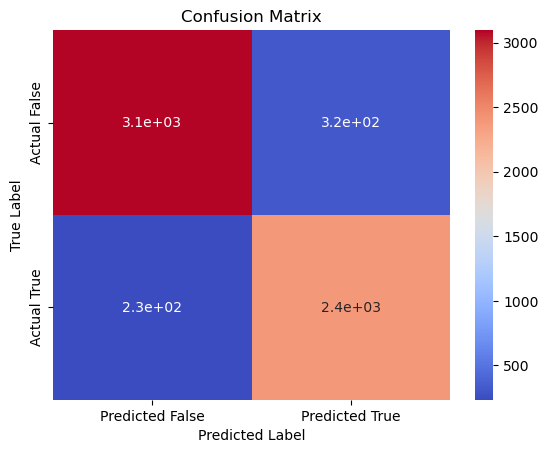

In [207]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, check_y)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="coolwarm", xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [208]:
accuracy_score(y_test, check_y)

0.907705053852527

### Use the saved model to test unseen data (testing dataset)

In [209]:
X_test = test_df

# remove all rows consisting of null values
test_df = test_df.dropna()

# keep the vocabulary size limited, for accuracy decreases if the vocubulary size increases.
vocabulary_size = 5000 

new_table2 = X_test.copy()
new_table2.reset_index(inplace=True)

new_table2.head(5)

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [210]:

stemmerTwo = PorterStemmer()
corpusTwo = [] # consists of rows of stemmed words

for i in range(0, len(new_table2)):
    
    review = re.sub('[^A-Za-z]', ' ', new_table2['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmerTwo.stem(word) for word in review if not word in stopwords.words('english')]

    review = ' '.join(review)
    corpusTwo.append(review)

    
# A unique value (in integers) is assigned to each word in the corpus list
onehot_representation_Two = [one_hot(words, vocabulary_size)for words in corpusTwo]

sentence_length = 20

embedded_layers_Two=pad_sequences(onehot_representation_Two,padding='pre',maxlen=sentence_length)
embedded_layers_Two

TypeError: expected string or bytes-like object

In [211]:
loaded_model = load_model('FakeNewsDetector.h5')
predictions = loaded_model.predict(embedded_layers_Two)

check_y2 = loaded_model.predict(embedded_layers_Two)

predictions = (predictions > 0.5)
predictions = predictions.reshape(-1)

encoder = LabelEncoder()
predictions = encoder.fit_transform(predictions)
predictions

143/143 [==============================] - 1s 5ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [212]:
# check if the predicted output is fake or reliable, using unseen data from the testing dataset

for i in range(50,71):
    print("predicted output: ",check_y2[i].round())

    if (check_y[i] == 0):
        print("It is reliable!")
        print()

    else:
        print("It is fake!")
        print()

   


predicted output:  [1.]
It is fake!

predicted output:  [0.]
It is fake!

predicted output:  [1.]
It is reliable!

predicted output:  [1.]
It is reliable!

predicted output:  [1.]
It is fake!

predicted output:  [1.]
It is fake!

predicted output:  [0.]
It is reliable!

predicted output:  [1.]
It is fake!

predicted output:  [1.]
It is fake!

predicted output:  [0.]
It is reliable!

predicted output:  [0.]
It is reliable!

predicted output:  [0.]
It is reliable!

predicted output:  [0.]
It is fake!

predicted output:  [0.]
It is reliable!

predicted output:  [1.]
It is reliable!

predicted output:  [0.]
It is fake!

predicted output:  [0.]
It is fake!

predicted output:  [1.]
It is fake!

predicted output:  [1.]
It is fake!

predicted output:  [1.]
It is reliable!

predicted output:  [1.]
It is fake!

